In [1]:
import os
import pandas as pd
import numpy as np
import random
import math
from decimal import Decimal

#from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt

In [2]:
# Normalize and transform the values for the two parameters (X1 - seq, and X2 - pattern)

def norm(a, b):
    t1 = Normalizer().fit([a])
    x1 = t1.transform([a])

    t2 = Normalizer().fit([b])
    x2 = t2.transform([b])
    return x1, x2

In [3]:
# Visualize  

def accurayPlot(x, y): 
    fig, ax = plt.subplots()
    ax.scatter(x, y, edgecolors=(0,0,0))
    ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--')
    ax.set_xlabel('Actual value')
    ax.set_ylabel('Predicted')
    plt.show()

In [4]:
path = 'D:/Bioinformatics/Diplom/'
file = 'RawData_200.csv'
dfRawData200 = pd.read_csv(path+'ML/ '+file)
dfRawData200.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1atx_,46,839,21.2,-1.500708,-58.865890,57.365182
1,1,1agg_,48,851,22.2,-1.797210,-60.767012,58.969802
2,2,1akhA,49,925,22.4,-5.642586,-53.350390,47.707804
3,3,1afp_,51,961,22.8,-5.542472,-72.049554,66.507082
4,4,1apq_,53,946,25.3,-3.719619,-62.522390,58.802771


In [5]:
file = 'RawData_45.csv'
dfRawData45 = pd.read_csv(path+'ML/ '+file)
dfRawData45.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1ucs,64,1277,27.8,-5.206702,-62.191532,56.984831
1,1,1utg,70,1392,33.8,2.337073,-62.333290,64.670363
2,2,2zeq,78,1519,34.5,-7.310388,-66.115704,58.805316
3,3,2uwr,79,1438,33.8,9.941533,-75.902193,85.843726
4,4,1gvp,87,1764,40.5,-0.145521,-63.846364,63.700843


In [6]:
dfAllRD = dfRawData200
dfAllRD = dfAllRD.append(dfRawData45, ignore_index=True)
dfAllRD.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
0,0,1atx_,46,839,21.2,-1.500708,-58.865890,57.365182
1,1,1agg_,48,851,22.2,-1.797210,-60.767012,58.969802
2,2,1akhA,49,925,22.4,-5.642586,-53.350390,47.707804
3,3,1afp_,51,961,22.8,-5.542472,-72.049554,66.507082
4,4,1apq_,53,946,25.3,-3.719619,-62.522390,58.802771


In [7]:
dfAllRandom = shuffle(dfAllRD)
dfAllRandom.head()

,Unnamed: 0,name,Length,X1,X2,E,S,L
197,197,1aco_,753,14196,264.3,-52.952446,-212.037528,159.085082
215,15,1c44,123,2344,51.3,-15.273949,-91.377744,76.103795
229,29,1is1,185,3387,79.3,-28.175671,-112.130311,83.954641
99,99,1auoA,218,4172,85.6,-19.705532,-99.713004,80.007473
55,55,1aly_,146,2879,61.3,-14.863538,-87.832316,72.968778


In [8]:
df200 = dfAllRandom[:200]
df45 = dfAllRandom[200:]

In [9]:
# Normalize and transform the values for the two parameters (X1 - seq, and X2 - pattern)

# Train data
x1train, x2train = norm(df200.X1, df200.X2)
# Test data
x1test, x2test = norm(df45.X1, df45.X2)

In [10]:
# Create a DF for the training
dfTrain = pd.DataFrame()
dfTrain["x1"] = x1train[0]
dfTrain["x2"] = x2train[0]
#dfTrainE["y"] = dfRawData.E.tolist()

# Create a DF for testing
dfTest = pd.DataFrame()
dfTest["x1"] = x1test[0]
dfTest["x2"] = x2test[0]

In [11]:
# Lasso
# Train for E
reg = linear_model.Lasso(alpha=0.1)
reg.fit(dfTrain, df200.E.tolist())

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
# Lasso predict
lassoE = reg.predict(dfTest) 

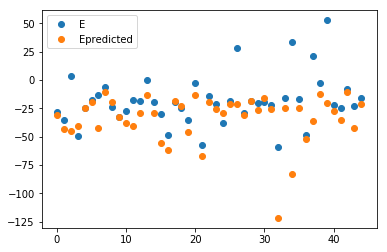

In [13]:
dfLassoE = pd.DataFrame()
dfLassoE["E"] = df45.E.tolist()
dfLassoE["Epredicted"] = lassoE.tolist()
dfLassoE.plot(style='o')

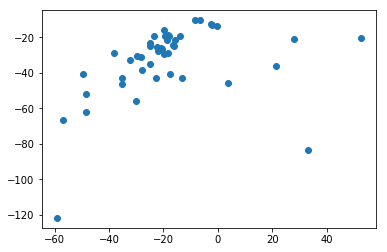

In [14]:
plt.scatter(df45.E.tolist(), lassoE.tolist())

In [15]:
# Train for L
reg = linear_model.Lasso(alpha=0.1)
reg.fit(dfTrain, df200.L.tolist())

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# Lasso predict
lassoL = reg.predict(dfTest) 

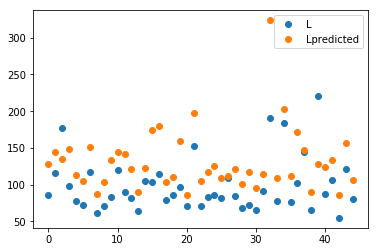

In [17]:
dfLassoL = pd.DataFrame()
dfLassoL["L"] = df45.L.tolist()
dfLassoL["Lpredicted"] = lassoL.tolist()
dfLassoL.plot(style='o')

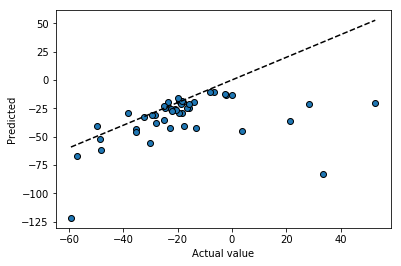

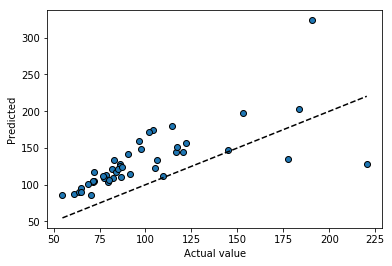

In [18]:
accurayPlot(df45.E, lassoE)
accurayPlot(df45.L, lassoL)

In [19]:
# 1.4.2. Regression (Support Vector Machines)
# E 
clf = svm.SVR()
clf.fit(dfTrain, df200.E.tolist())

C:\Users\katse\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svregE = clf.predict(dfTest)

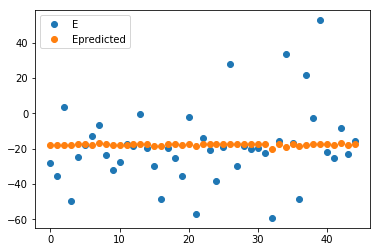

In [21]:
dfsvregE = pd.DataFrame()
dfsvregE["E"] = df45.E.tolist()
dfsvregE["Epredicted"] = svregE.tolist()
dfsvregE.plot(style='o')

In [22]:
# L 
clf = svm.SVR(C=.5,epsilon=0.4, kernel='rbf',)
clf.fit(dfTrain, df200.L.tolist())

C:\Users\katse\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.4,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
svregL = clf.predict(dfTest)

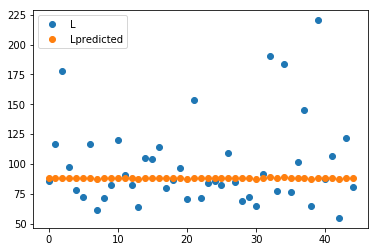

In [24]:
dfsvregL = pd.DataFrame()
dfsvregL["L"] = df45.L.tolist()
dfsvregL["Lpredicted"] = svregL.tolist()
dfsvregL.plot(style='o')

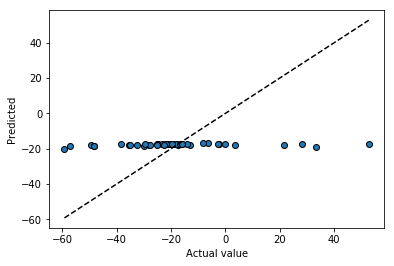

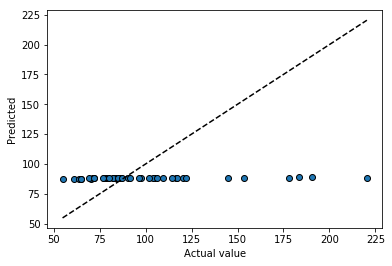

In [25]:
accurayPlot(df45.E, svregE)
accurayPlot(df45.L, svregL)

In [26]:
# 1.6.3. Nearest Neighbors Regression
# E
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(dfTrain, df200.E.tolist())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [27]:
nnrE = neigh.predict(dfTest)

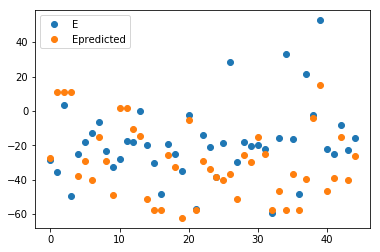

In [28]:
dfnnrE = pd.DataFrame()
dfnnrE["E"] = df45.E.tolist()
dfnnrE["Epredicted"] = nnrE.tolist()
dfnnrE.plot(style='o')

In [29]:
# L
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(dfTrain, df200.L.tolist())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [30]:
nnrL = neigh.predict(dfTest)

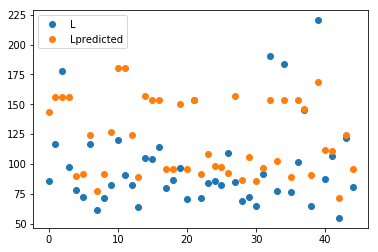

In [31]:
dfnnrL = pd.DataFrame()
dfnnrL["L"] = df45.L.tolist()
dfnnrL["Lpredicted"] = nnrL.tolist()
dfnnrL.plot(style='o')

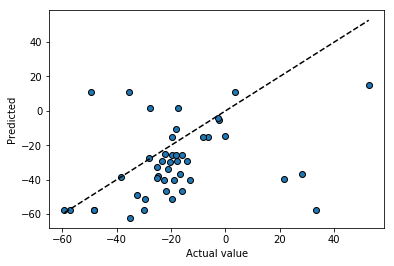

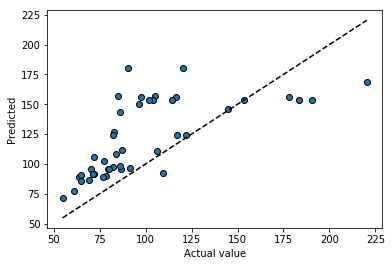

In [32]:
accurayPlot(df45.E, nnrE)
accurayPlot(df45.L, nnrL)

In [33]:
# 1.10.2. Regression - Decisiion Tree  Regresion 
# E
clf = tree.DecisionTreeRegressor()
clf = clf.fit(dfTrain, df200.E.tolist())
dtreeE = clf.predict(dfTest)

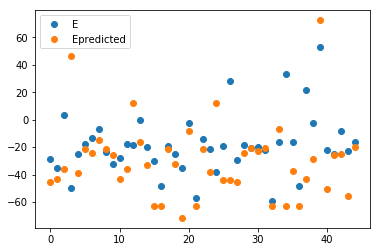

In [34]:
dfdtreeE = pd.DataFrame()
dfdtreeE["E"] = df45.E.tolist()
dfdtreeE["Epredicted"] = dtreeE.tolist()
dfdtreeE.plot(style='o')

In [35]:
# L
clf = tree.DecisionTreeRegressor()
clf = clf.fit(dfTrain, df200.L.tolist())
dtreeL = clf.predict(dfTest)

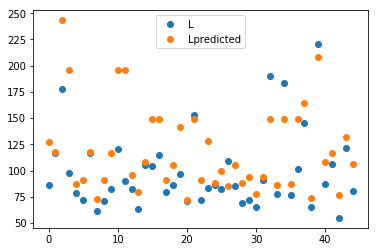

In [36]:
dfdtreeL = pd.DataFrame()
dfdtreeL["L"] = df45.L.tolist()
dfdtreeL["Lpredicted"] = dtreeL.tolist()
dfdtreeL.plot(style='o')

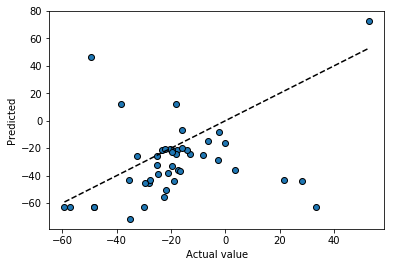

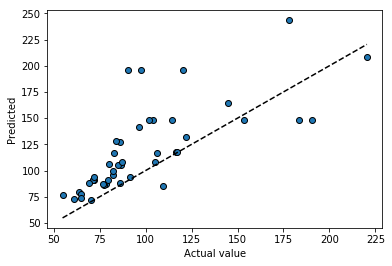

In [37]:
accurayPlot(df45.E, dtreeE)
accurayPlot(df45.L, dtreeL)